In [1]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [2]:
# MEL-14 wet season year 1
(mg_m14_20201203_sfm,z_m14_20201203_sfm) = read_esri_ascii("m14/wsyr1/m14_20201203_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20210224_sfm,z_m14_20210224_sfm) = read_esri_ascii("m14/wsyr1/m14_20210224_sfm.asc", \
    name='topographic__elevation')


# MEL-14 dry season year 1
(mg_m14_20210603_sfm,z_m14_20210603_sfm) = read_esri_ascii("m14/dsyr1/m14_20210603_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20210914_sfm,z_m14_20210914_sfm) = read_esri_ascii("m14/dsyr1/m14_20210914_sfm.asc", \
    name='topographic__elevation')


# MEL-14 wet season year 2
(mg_m14_20220309_sfm,z_m14_20220309_sfm) = read_esri_ascii("m14/wsyr2/m14_20220309_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220316_sfm,z_m14_20220316_sfm) = read_esri_ascii("m14/wsyr2/m14_20220316_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220324_sfm,z_m14_20220324_sfm) = read_esri_ascii("m14/wsyr2/m14_20220324_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220411_sfm,z_m14_20220411_sfm) = read_esri_ascii("m14/wsyr2/m14_20220411_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220428_sfm,z_m14_20220428_sfm) = read_esri_ascii("m14/wsyr2/m14_20220428_sfm.asc", \
    name='topographic__elevation')

(mg_m14_20220601_sfm,z_m14_20220601_sfm) = read_esri_ascii("m14/wsyr2/m14_20220601_sfm.asc", \
    name='topographic__elevation')

In [3]:
mg_m14_20201203_sfm.status_at_node[z_m14_20201203_sfm == -9999] = mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210224_sfm.status_at_node[z_m14_20210224_sfm == -9999] = mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE

mg_m14_20210603_sfm.status_at_node[z_m14_20210603_sfm == -9999] = mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20210914_sfm.status_at_node[z_m14_20210914_sfm == -9999] = mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE


mg_m14_20220309_sfm.status_at_node[z_m14_20220309_sfm == -9999] = mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220316_sfm.status_at_node[z_m14_20220316_sfm == -9999] = mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220324_sfm.status_at_node[z_m14_20220324_sfm == -9999] = mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220411_sfm.status_at_node[z_m14_20220411_sfm == -9999] = mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220428_sfm.status_at_node[z_m14_20220428_sfm == -9999] = mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE
mg_m14_20220601_sfm.status_at_node[z_m14_20220601_sfm == -9999] = mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE

In [4]:
fa_m14_20201203_sfm = FlowAccumulator(mg_m14_20201203_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210224_sfm = FlowAccumulator(mg_m14_20210224_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')




fa_m14_20210603_sfm = FlowAccumulator(mg_m14_20210603_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20210914_sfm = FlowAccumulator(mg_m14_20210914_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')




fa_m14_20220309_sfm = FlowAccumulator(mg_m14_20220309_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220316_sfm = FlowAccumulator(mg_m14_20220316_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220324_sfm = FlowAccumulator(mg_m14_20220324_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220411_sfm = FlowAccumulator(mg_m14_20220411_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220428_sfm = FlowAccumulator(mg_m14_20220428_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

fa_m14_20220601_sfm = FlowAccumulator(mg_m14_20220601_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [5]:
(da_m14_20201203_sfm, discharge_m14_20201203_sfm) = fa_m14_20201203_sfm.accumulate_flow()
(da_m14_20210224_sfm, discharge_m14_20210224_sfm) = fa_m14_20210224_sfm.accumulate_flow()

(da_m14_20210603_sfm, discharge_m14_20210603_sfm) = fa_m14_20210603_sfm.accumulate_flow()
(da_m14_20210914_sfm, discharge_m14_20210914_sfm) = fa_m14_20210914_sfm.accumulate_flow()

(da_m14_20220309_sfm, discharge_m14_20220309_sfm) = fa_m14_20220309_sfm.accumulate_flow()
(da_m14_20220316_sfm, discharge_m14_20220316_sfm) = fa_m14_20220316_sfm.accumulate_flow()
(da_m14_20220324_sfm, discharge_m14_20220324_sfm) = fa_m14_20220324_sfm.accumulate_flow()
(da_m14_20220411_sfm, discharge_m14_20220411_sfm) = fa_m14_20220411_sfm.accumulate_flow()
(da_m14_20220428_sfm, discharge_m14_20220428_sfm) = fa_m14_20220428_sfm.accumulate_flow()
(da_m14_20220601_sfm, discharge_m14_20220601_sfm) = fa_m14_20220601_sfm.accumulate_flow()

## MEL-14 WSYR1

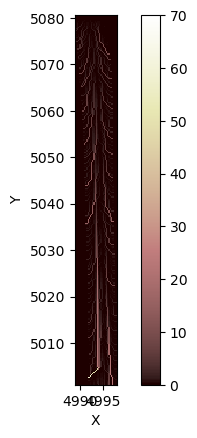

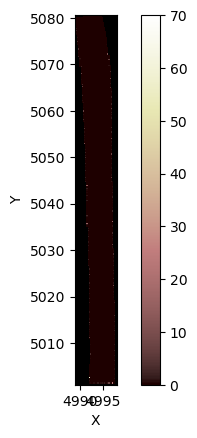

In [6]:
area = mg_m14_20201203_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20201203_sfm.node_has_boundary_neighbor(mg_m14_20201203_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20201203_sfm.imshow(mg_m14_20201203_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20201203_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20201203_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20201203_sfm.at_node['boundary_drainage'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20201203_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

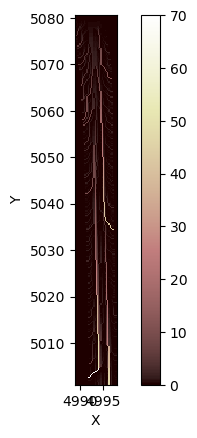

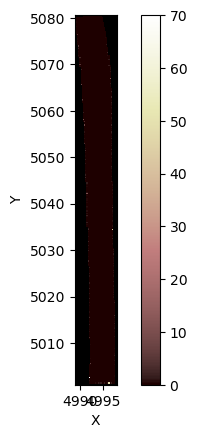

In [7]:
area = mg_m14_20210224_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210224_sfm.node_has_boundary_neighbor(mg_m14_20210224_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210224_sfm.imshow(mg_m14_20210224_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20210224_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210224_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210224_sfm.at_node['boundary_drainage'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210224_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

In [8]:
mg_m14_20201203_sfm.at_node['boundary_drainage'][mg_m14_20201203_sfm.status_at_node==mg_m14_20201203_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210224_sfm.at_node['boundary_drainage'][mg_m14_20210224_sfm.status_at_node==mg_m14_20210224_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [9]:
write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_sfm_drainage.asc',mg_m14_20201203_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20210224_sfm_drainage.asc',mg_m14_20210224_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/wsyr1/out/mg_m14_20201203_sfm_drainage_map.asc',mg_m14_20201203_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr1/out/mg_m14_20210224_sfm_drainage_map.asc',mg_m14_20210224_sfm,names='drainage_area',clobber=True)

['m14/wsyr1/out/mg_m14_20210224_sfm_drainage_map.asc']

## MEL-14 DSYR1

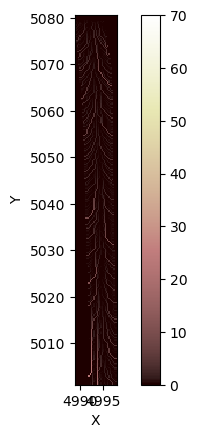

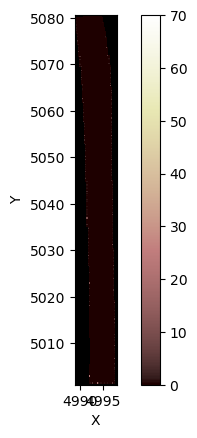

In [10]:
area = mg_m14_20210603_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210603_sfm.node_has_boundary_neighbor(mg_m14_20210603_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210603_sfm.imshow(mg_m14_20210603_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20210603_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210603_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210603_sfm.at_node['boundary_drainage'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210603_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

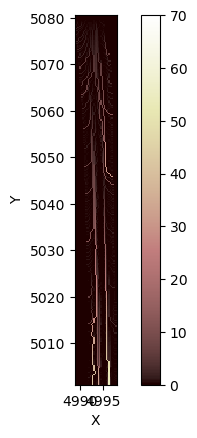

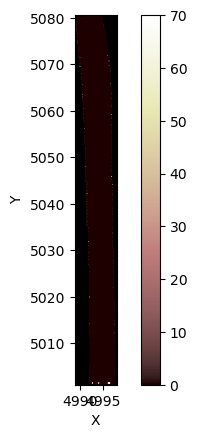

In [11]:
area = mg_m14_20210914_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20210914_sfm.node_has_boundary_neighbor(mg_m14_20210914_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20210914_sfm.imshow(mg_m14_20210914_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20210914_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20210914_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20210914_sfm.at_node['boundary_drainage'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20210914_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

In [12]:
mg_m14_20210603_sfm.at_node['boundary_drainage'][mg_m14_20210603_sfm.status_at_node==mg_m14_20210603_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20210914_sfm.at_node['boundary_drainage'][mg_m14_20210914_sfm.status_at_node==mg_m14_20210914_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [13]:
write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_sfm_drainage.asc',mg_m14_20210603_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_sfm_drainage.asc',mg_m14_20210914_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/dsyr1/out/mg_m14_20210603_sfm_drainage_map.asc',mg_m14_20210603_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/dsyr1/out/mg_m14_20210914_sfm_drainage_map.asc',mg_m14_20210914_sfm,names='drainage_area',clobber=True)

['m14/dsyr1/out/mg_m14_20210914_sfm_drainage_map.asc']

## MEL-14 WSYR2

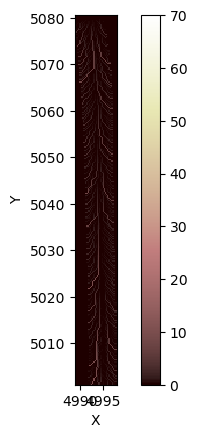

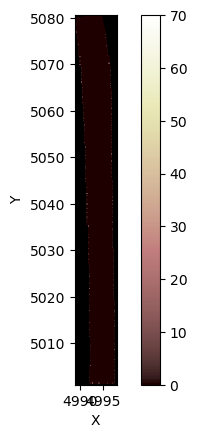

In [14]:
area = mg_m14_20220309_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220309_sfm.node_has_boundary_neighbor(mg_m14_20220309_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220309_sfm.imshow(mg_m14_20220309_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20220309_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220309_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220309_sfm.at_node['boundary_drainage'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220309_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

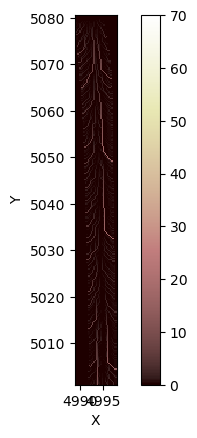

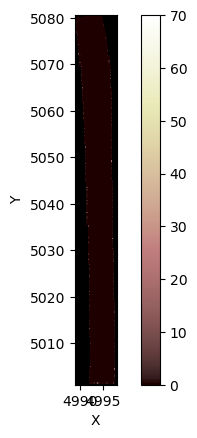

In [15]:
area = mg_m14_20220316_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220316_sfm.node_has_boundary_neighbor(mg_m14_20220316_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220316_sfm.imshow(mg_m14_20220316_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20220316_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220316_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220316_sfm.at_node['boundary_drainage'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220316_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

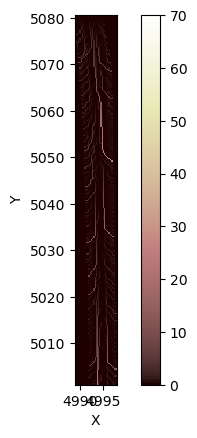

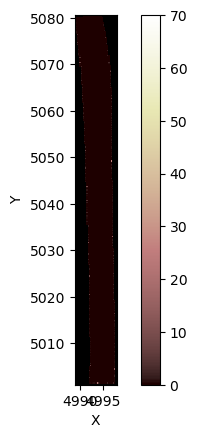

In [16]:
area = mg_m14_20220324_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220324_sfm.node_has_boundary_neighbor(mg_m14_20220324_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220324_sfm.imshow(mg_m14_20220324_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20220324_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220324_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220324_sfm.at_node['boundary_drainage'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220324_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

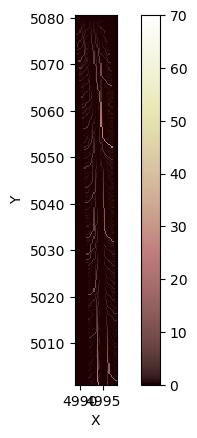

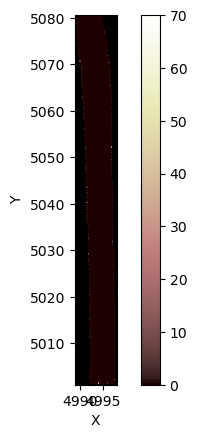

In [17]:
area = mg_m14_20220411_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220411_sfm.node_has_boundary_neighbor(mg_m14_20220411_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220411_sfm.imshow(mg_m14_20220411_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20220411_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220411_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220411_sfm.at_node['boundary_drainage'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220411_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

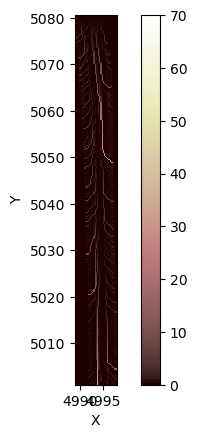

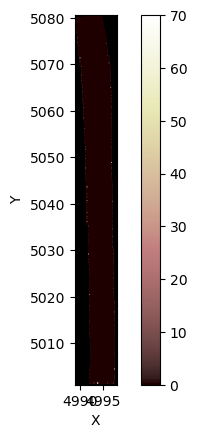

In [18]:
area = mg_m14_20220428_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220428_sfm.node_has_boundary_neighbor(mg_m14_20220428_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220428_sfm.imshow(mg_m14_20220428_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20220428_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220428_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220428_sfm.at_node['boundary_drainage'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220428_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

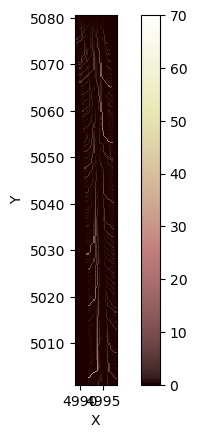

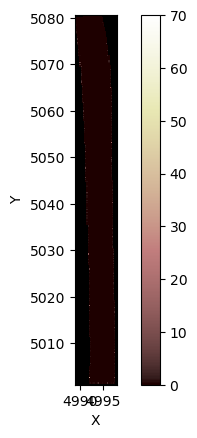

In [19]:
area = mg_m14_20220601_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_m14_20220601_sfm.node_has_boundary_neighbor(mg_m14_20220601_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_m14_20220601_sfm.imshow(mg_m14_20220601_sfm.at_node['drainage_area'], vmin=0, vmax=70)
plt.show()

mask = np.zeros(len(mg_m14_20220601_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_m14_20220601_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
mg_m14_20220601_sfm.at_node['boundary_drainage'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = np.nan
imshow_grid(mg_m14_20220601_sfm, 'boundary_drainage', vmin=0, vmax=70)
plt.show()

In [20]:
mg_m14_20220309_sfm.at_node['boundary_drainage'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220316_sfm.at_node['boundary_drainage'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220324_sfm.at_node['boundary_drainage'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220411_sfm.at_node['boundary_drainage'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220428_sfm.at_node['boundary_drainage'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_sfm.at_node['boundary_drainage'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

mg_m14_20220309_sfm.at_node['drainage_area'][mg_m14_20220309_sfm.status_at_node==mg_m14_20220309_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220316_sfm.at_node['drainage_area'][mg_m14_20220316_sfm.status_at_node==mg_m14_20220316_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220324_sfm.at_node['drainage_area'][mg_m14_20220324_sfm.status_at_node==mg_m14_20220324_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220411_sfm.at_node['drainage_area'][mg_m14_20220411_sfm.status_at_node==mg_m14_20220411_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220428_sfm.at_node['drainage_area'][mg_m14_20220428_sfm.status_at_node==mg_m14_20220428_sfm.BC_NODE_IS_FIXED_VALUE] = 18000
mg_m14_20220601_sfm.at_node['drainage_area'][mg_m14_20220601_sfm.status_at_node==mg_m14_20220601_sfm.BC_NODE_IS_FIXED_VALUE] = 18000

In [21]:
write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_sfm_drainage.asc',mg_m14_20220309_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220316_sfm_drainage.asc',mg_m14_20220316_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220324_sfm_drainage.asc',mg_m14_20220324_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220411_sfm_drainage.asc',mg_m14_20220411_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220428_sfm_drainage.asc',mg_m14_20220428_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_sfm_drainage.asc',mg_m14_20220601_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('m14/wsyr2/out/mg_m14_20220309_sfm_drainage_map.asc',mg_m14_20220309_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220316_sfm_drainage_map.asc',mg_m14_20220316_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220324_sfm_drainage_map.asc',mg_m14_20220324_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220411_sfm_drainage_map.asc',mg_m14_20220411_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220428_sfm_drainage_map.asc',mg_m14_20220428_sfm,names='drainage_area',clobber=True)
write_esri_ascii('m14/wsyr2/out/mg_m14_20220601_sfm_drainage_map.asc',mg_m14_20220601_sfm,names='drainage_area',clobber=True)

['m14/wsyr2/out/mg_m14_20220601_sfm_drainage_map.asc']